<span style="font-size: 30px;">Assignment-4</span>  
<span style="font-size: 25px;">Pabitra Ranjan Giri</span>  
<span style="font-size: 25px;">Roll-2011103</span>


<span style="font-size: 25px;">Question-1</span>

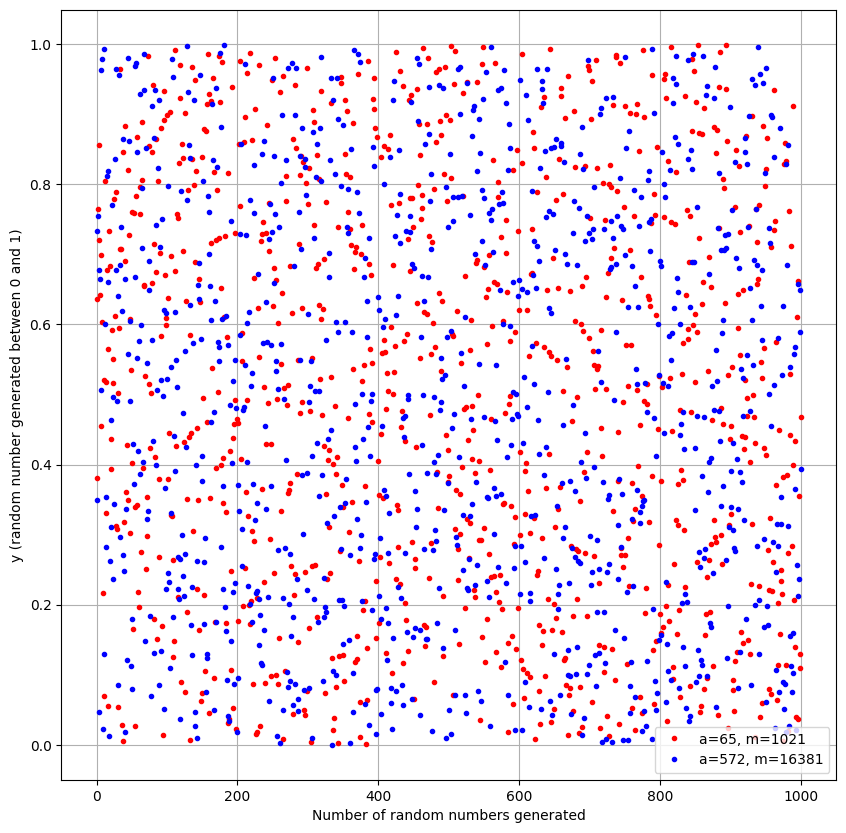

In [11]:
import mylibrary.lcg as lcg # Importing Linear Congruential Generator pRNG
import matplotlib.pyplot as plt
import numpy as np # for x-axis plotting only

num = 1000 # number of random numbers to be generated
x = np.linspace(0,num,num)
a = 65
m = 1021
y = lcg.main(a,m,num) # Generating random numbers
plt.figure(figsize=(10,10))
plt.plot(x,y,'r.',label=("a="+str(a)+", m="+str(m)))

a = 572
m = 16381
y = lcg.main(a,m,num) # Generating random numbers
plt.plot(x,y,'b.',label=("a="+str(a)+", m="+str(m)))
plt.xlabel("Number of random numbers generated")
plt.ylabel("y (random number generated between 0 and 1)")
plt.legend()
plt.grid(True)
plt.show()

The above plot shows the random numbers generated by Multiplicative Linear Congruential Generator.  
The red dots are for a = 65, m = 1021  
The blue dots are for a = 572, m = 16381

<span style="font-size: 25px;">Question-2</span>

Approximated integral for N=1000 : 1.991206912734898
Approximated integral for N=100000 : 1.9998697387351816


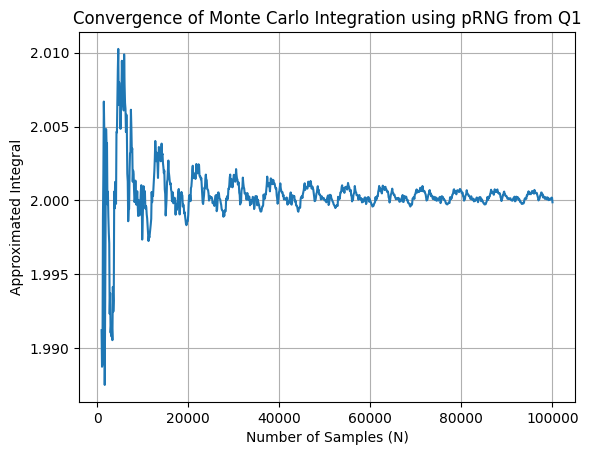

In [7]:
import math
import mylibrary.lcg as lcg # Importing LCG pRNG used in Q1
import mylibrary.mcr as mcr # Importing Monte-Carlo integrator
import numpy as np # for x-axis plotting only
import matplotlib.pyplot as plt

# The function to integrate
def f(x):
    return math.cos(x)

# Range of N values
N_values = np.linspace(1000, 100001, 1000)

a_lim = -math.pi/2 # Lower limit of the integral
b_lim = math.pi/2 # Upper limit of the integral

# Calculating the integral approximation for each N
integral_approximations = [mcr.main(f,a_lim,b_lim,lcg.main(572,16381,int(N))) for N in N_values]

# Plot the convergence
print("Approximated integral for N=1000 :",integral_approximations[0])
print("Approximated integral for N=100000 :",integral_approximations[-1])
plt.plot(N_values, integral_approximations)
plt.xlabel('Number of Samples (N)')
plt.ylabel('Approximated Integral')
plt.title('Convergence of Monte Carlo Integration using pRNG from Q1')
plt.grid(True)
plt.show()

The actual value of the integral is 2 (calculated analytically)  
The value of the integral calculated using Monte Carlo method is close to 2  
As we increase the number of random numbers the value of the integral becomes more accurate

<span style="font-size: 25px;">Question-3</span>

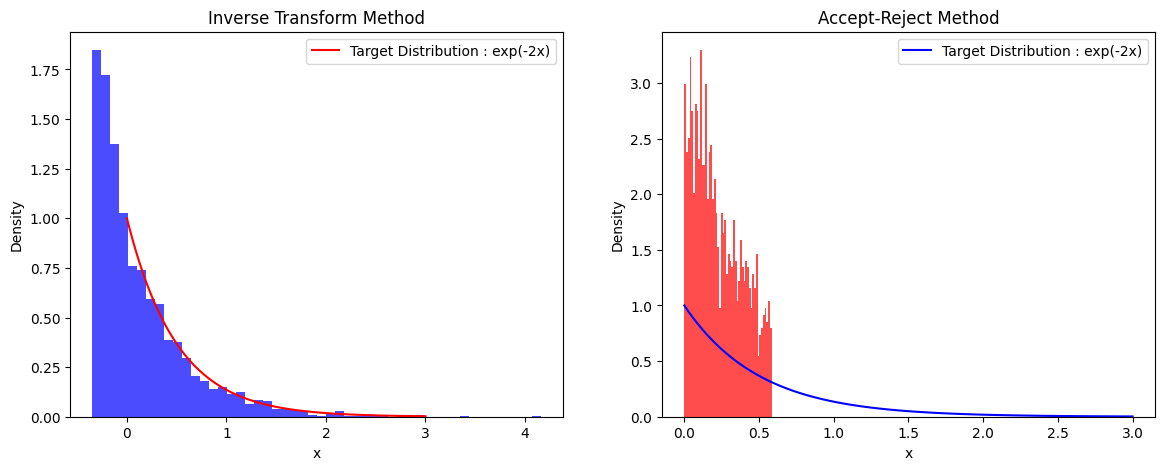

In [13]:
import numpy as np # For defining arrays
import math
import mylibrary.lcg as lcg # Importing LCG pRNG used in Q1
import matplotlib.pyplot as plt

# Inverse transform method
def inverse_transform(N):
    # Generating uniform random numbers using pRNG
    u_list = lcg.main(572,16381,N)
    
    # Inverse transform to get exponential distributed numbers
    x_inverse = [-math.log(2 - 2*u)/2 for u in u_list]
    
    return x_inverse

# Sampling distribution q(x)
def q(x):
    return 2-x

# Inverse transformation of the sampling distribution
def q_inv(x):
    return 2 - math.sqrt(4 - 2*x)

# Target distribution f(x)
def f(x):
    return math.exp(-2*x)

# Accept/reject method
def accept_reject(N):
    c = 0.5 # Calculated analytically
    a = 0
    b = 3
    # Generate random numbers uniformly for x
    x_list = np.array(lcg.main(572,16381,N))

    # Generate random numbers uniformly for u
    u_list = np.linspace(0,1,N)

    z_list = [q_inv(x) for x in x_list]
    x_accepted = []
    for i in range(len(x_list)):
        if u_list[i] <= f(z_list[i])/(c*q(z_list[i])): # Acceptance criterion
            x_accepted.append(z_list[i]) # Accepted random numbers
    
    return x_accepted

# Generate random numbers using both methods
N_samples = 2000
x_inverse = inverse_transform(N_samples)
x_accepted = accept_reject(N_samples)
# Plot histograms
plt.figure(figsize=(14, 5))

# Histogram for inverse transform method
plt.subplot(1, 2, 1)
plt.hist(x_inverse, bins=50, density=True, color='blue', alpha=0.7)
x_values = np.linspace(0, 3, 100)
f_x = [f(x) for x in x_values]
plt.plot(x_values, f_x, 'r-', label='Target Distribution : exp(-2x)')
plt.title('Inverse Transform Method')
plt.xlabel('x')
plt.ylabel('Density')
plt.legend()
# Histogram for accept/reject method
plt.subplot(1, 2, 2)
plt.hist(x_accepted, bins=50, density=True, color='red', alpha=0.7)
plt.plot(x_values, f_x, 'b-', label='Target Distribution : exp(-2x)')
plt.title('Accept-Reject Method')
plt.xlabel('x')
plt.ylabel('Density')
plt.legend()
plt.show()


Inverse Transform method:  
The 1st plot is for Inverse transformation method, sampling correctly fits the target function f(x) = $e^{-2x}$.  
  
Accept-Reject method:  
The 2nd plot is for accept-reject method, here the sampled distribution does not fit the target distribution because  
 the sampling distribution,q(x) = 2-x , is not good enough for sampling the target distribution f(x) = $e^{-2x}$.  
Therefore the distribution does not fit.

<span style="font-size: 25px;">Question-4</span>

In [12]:
import math
import mylibrary.mcis as mcis # Monte carlo integrator using Importance sampling

# Number of samples
N = 10000

# Target function f(x)
def f(x): return math.exp(-2*x) / (1 + x**2)

# Importance sampling functions
def p1(x): return 0.5

def p2(x): return math.exp(-x)

def p3(x): return math.exp(-x/2)/(2*(1 - math.exp(-0.5)))

# Inverse transformations of sampling functions
def p1_inv(x): return 2*x

def p2_inv(x): return -math.log(1-x)

def p3_inv(x): return -2*math.log(1 - x*(1 - math.exp(-0.5)))

# Evaluate integral with each importance sampling function
# mcis.main is a integrator using Monte carlo importance sampling
integral_p1 = mcis.main(f,p1,p1_inv,N)
integral_p2 = mcis.main(f,p2,p2_inv,N)
integral_p3 = mcis.main(f,p3,p3_inv,N)

# Output
print("Integral estimate with p1 :",integral_p1)
print("Integral estimate with p2 :",integral_p2)
print("Integral estimate with p3 :",integral_p3)

Integral estimate with p1 : 0.3961208101236749
Integral estimate with p2 : 0.39783523253530423
Integral estimate with p3 : 0.37526847066519403


The actual value of the integral is : 0.397675  
The second sampling function, p(x) =  $e^{-x}$ ,gives the most accurate value for the integral  
Thus variance reduction is the most in the second sampling function(i.e. variance is the least)  
This is because the second function is closest to the f(x) in terms of exponential